In [1]:
# python
import sys
import os
import importlib
# columnar analysis
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
fname = '~/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root'
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
    metadata = {
       "dataset": "tt_alp", 
    },
).events()

In [3]:
#ak.fields(events)

In [4]:
ak.fields(events.Muon)

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'idx',
 'trkPt',
 'trkPtErr',
 'dxyPV',
 'dxyPVErr',
 'dzPV',
 'dzPVErr',
 'dxyPVTraj',
 'dxyPVTrajErr',
 'dxyPVAbs',
 'dxyPVAbsErr',
 'dxyPVSigned',
 'dxyPVSignedErr',
 'ip3DPVAbs',
 'ip3DPVAbsErr',
 'ip3DPVSigned',
 'ip3DPVSignedErr',
 'dxyBS',
 'dxyBSErr',
 'dzBS',
 'dzB

In [5]:
import numpy as np
print(events.DSAMuon.vx)
print(events.DSAMuon.vy)
print(np.sqrt(events.DSAMuon.vx**2 + events.DSAMuon.vy**2))
print(events.DSAMuon.pt)
print(events.Muon.mass)

[[], [57.2, 0.173, -7.89], [14], [], ... [0.0793], [3.32, 1.56, 29.5], [3.15]]
[[], [185, -15, -6.54], [7.76], [], ... [0.345], [-4.76, 10.9, 1.22], [1.57]]
[[], [194, 15, 10.3], [16], [], [], ... [11.6], [0.354], [5.81, 11, 29.6], [3.52]]
[[], [13.2, 1.52, 16.6], [26], [], [], ... 8.26], [17.2], [3.17, 2.41, 2.99], [44.5]]
[[], [0.106], [0.106, 0.106], [], [], ... [0.106], [0.106], [0.106], [0.106]]


In [6]:
p = sidm_processor.SidmProcessor(
    ["llpnano"],
    ["muon_base", "dsaMuon_base", "lj_base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)
out = p.process(events)

Not applying any cuts to the lepton jets for channel  llpnano
#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [7]:
out["tt_alp"]["hists"].keys()

dict_keys(['muon_n', 'muon_pt', 'muon_eta_phi', 'muon_absD0', 'muon_absD0_lowRange', 'dsaMuon_n', 'dsaMuon_pt', 'dsaMuon_eta_phi', 'dsaMuon_absD0', 'dsaMuon_absD0_lowRange', 'lj_n', 'lj_pt', 'egm_lj_pt', 'mu_lj_pt', 'lj0_pt', 'lj1_pt', 'lj0_e', 'lj1_e', 'lj0_dRSpread', 'lj1_dRSpread', 'lj_eta_phi', 'lj_electronN', 'lj_photonN', 'lj_electronPhotonN', 'lj_muonN'])

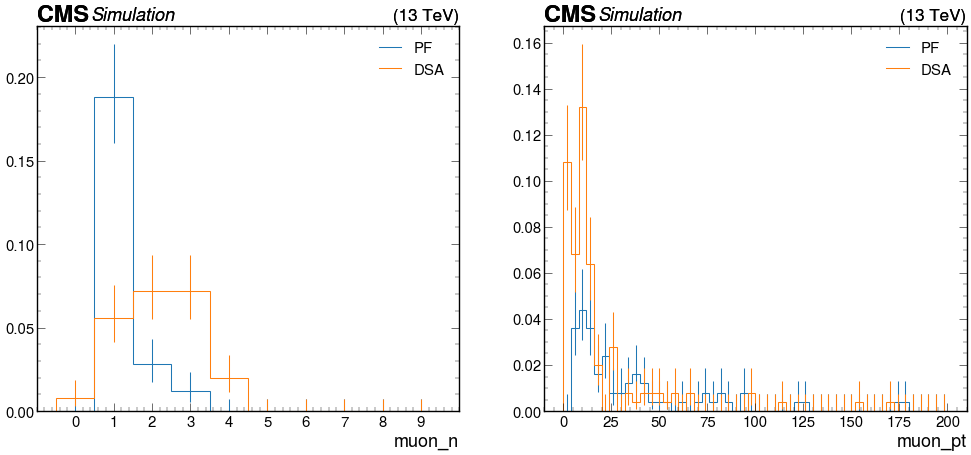

In [8]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(out["tt_alp"]["hists"]["muon_n"]["llpnano", :])
utilities.plot(out["tt_alp"]["hists"]["dsaMuon_n"]["llpnano", :])
plt.legend(["PF", "DSA"])
plt.subplot(1, 2, 2)
utilities.plot(out["tt_alp"]["hists"]["muon_pt"]["llpnano", ::2j])
utilities.plot(out["tt_alp"]["hists"]["dsaMuon_pt"]["llpnano", ::2j])
plt.legend(["PF", "DSA"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f64990ebca0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

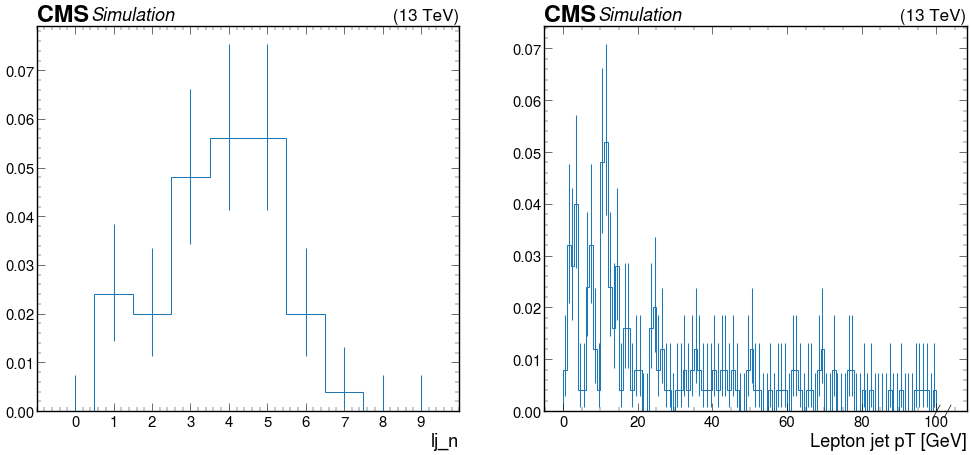

In [9]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(out["tt_alp"]["hists"]["lj_n"]["llpnano", :])
plt.subplot(1, 2, 2)
utilities.plot(out["tt_alp"]["hists"]["lj_pt"]["llpnano", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f64987749a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

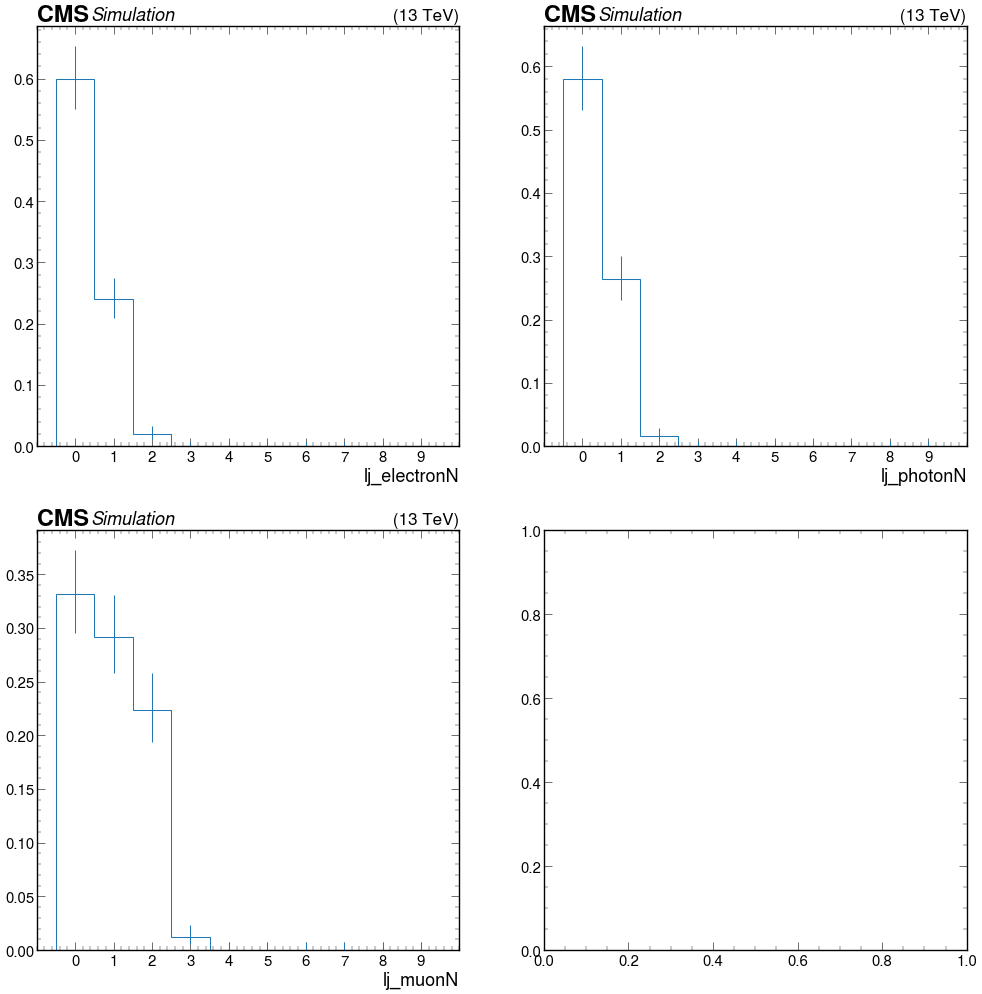

In [10]:
plt.subplots(2, 2, figsize=(24, 24))
plt.subplot(2, 2, 1)
utilities.plot(out["tt_alp"]["hists"]["lj_electronN"]["llpnano", :])
plt.subplot(2, 2, 2)
utilities.plot(out["tt_alp"]["hists"]["lj_photonN"]["llpnano", :])
plt.subplot(2, 2, 3)
utilities.plot(out["tt_alp"]["hists"]["lj_muonN"]["llpnano", :])
#plt.subplot(2, 2, 4)
#utilities.plot(out["tt_alp"]["hists"]["lj_dsaMuonN"]["llpnano", :])